In [47]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from pathlib import Path
import easyocr
import re

In [48]:
def print_image(image):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Converter BGR para RGB
    plt.axis('off')  # Remover eixos

FSCPORIO GALAS FOKINELLE
735.2 =
013.
PESSONI VALDILEI EX
6322I5527*0
DGEMIS
1C4IE4I4E4404U4
EFFONSO ALBERTINA RANCIARO
DX
0382
KM
{BRONIZESKI BERGZR ARCHA
(532,5A3070518
TAERNA
YABUKI . LIBANORI
[520762157'
{GALIZIA EVELY ANOUCH
7IFZGO838" &AN
PENGONZ VALDILEI GXK
7Z C
[ICCIARELLI KENICHI HIRA
75557,8963 <
'0U.{M
GAZACHIAS NODARI EACIROLI
750330725W,678
GILLIEI FATREZI BLBNILDO
OTA
[EGO353.12*
(BACANI BALAM LUCIE
819493C63
IEGOAE
~BA
GISNLO BARLSTTE ELISSIO
[A.O1I35" <
0OTM
FAGRON SANZ 'ANA SANVIBO
CDOGIPEN=
RERZ SERGIO NEIRE
GGOC"
EULT TENNON GNOVERTARI
[O6O5A
ELAILIRANALIU
(SWE:
'ERHTLDTYSR MTER-HRYDTATATNTTRTLTNTOTAB
DARBELLO FOLIZZL PRISCIIA
ZCARTE KALNACIQNAL
RO8310 BODZSTA CARAVATTO
~POC,ID
MIT IHTA
6OEZANI ANGKINONI ELZON
DOCT
IZLI RW44424
[SURI MILLS SIRUEZLL
~DOC LA
DA#EWIEMLO
(PIZIINO NASHIRA UBZDA
CPESA
JAVIUIWIAGI AUAMAL
RHUANN
BD
566123
FCONGZ MAGRIN GAZZZO
[IHOROOWROOM


/tmp/ipykernel_113593/2005651781.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


@IRTADORO TELKA
685547
FABOKE MOF KAGAOCHI
F252;685
THRILE"RII
(XESK SUGAI GALASSO
7OC7
INAGNTOMO DONATIELLO BENSE
CPOC


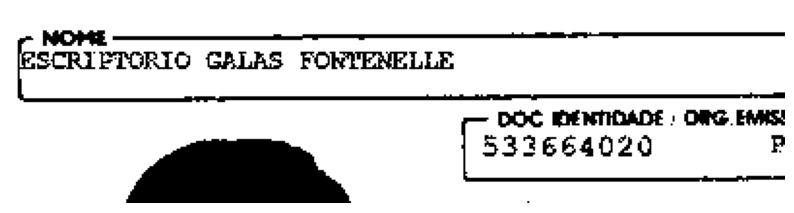

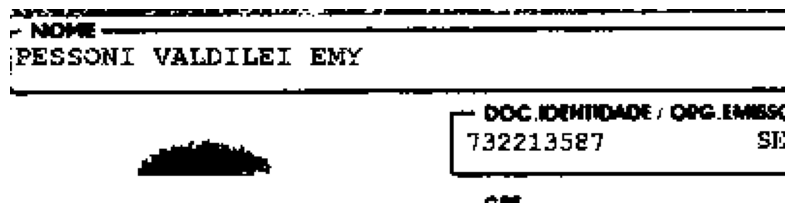

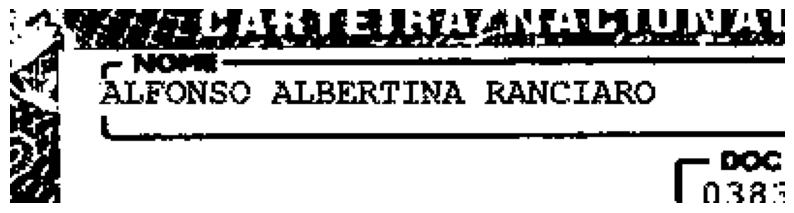

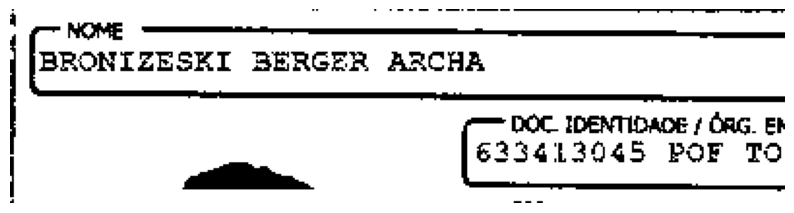

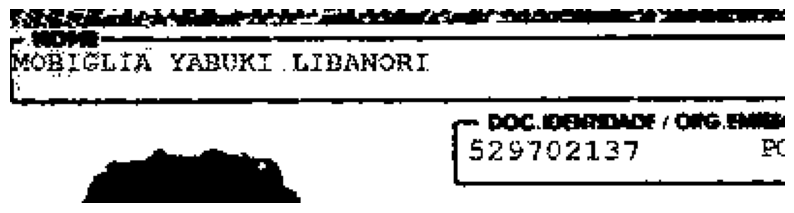

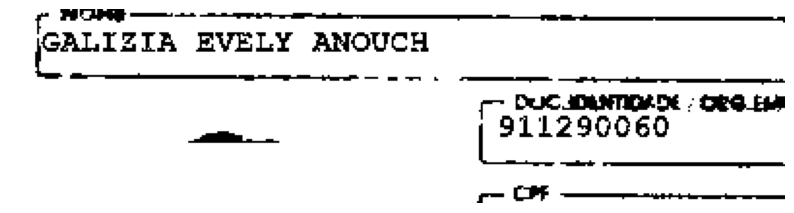

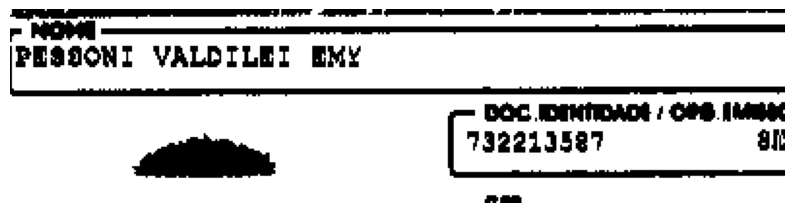

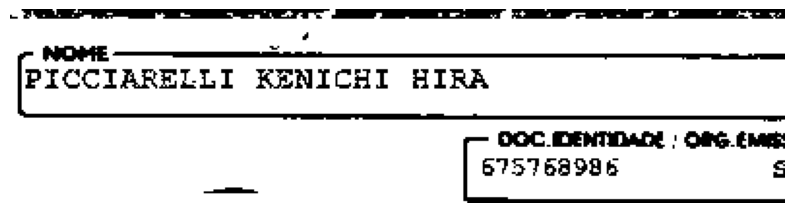

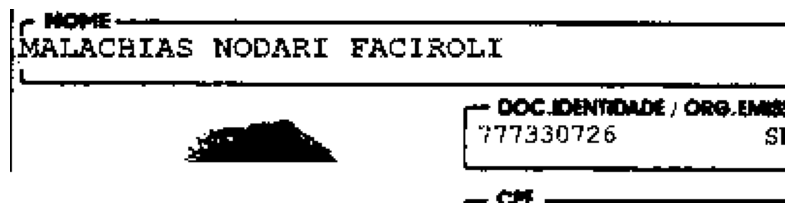

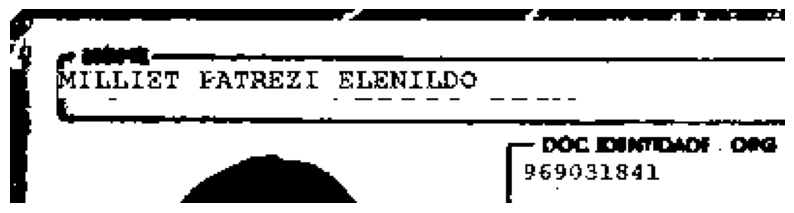

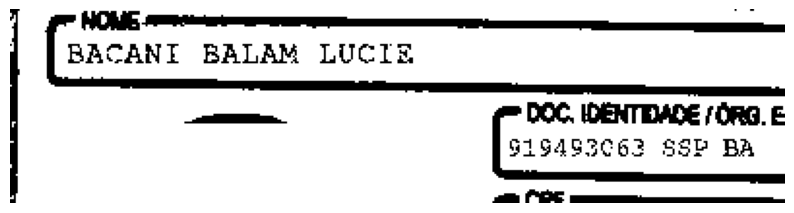

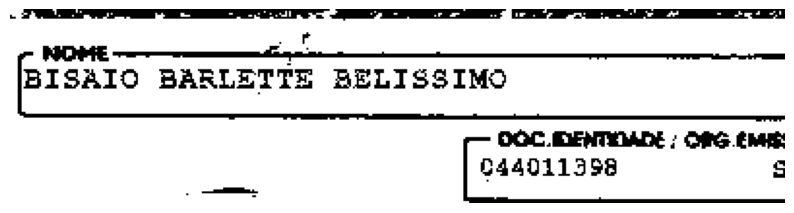

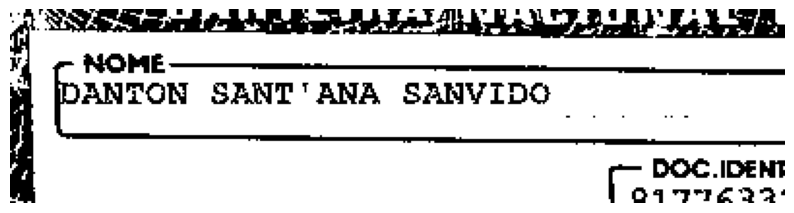

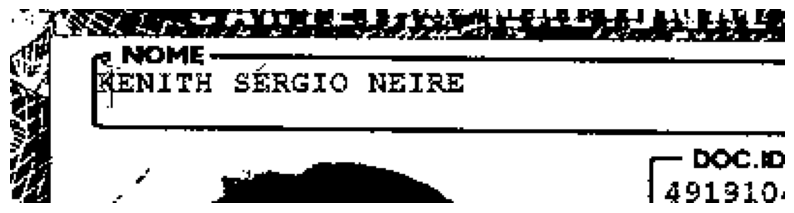

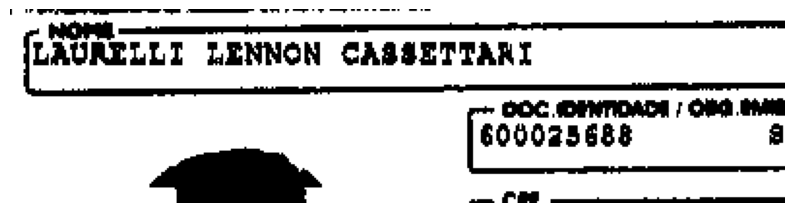

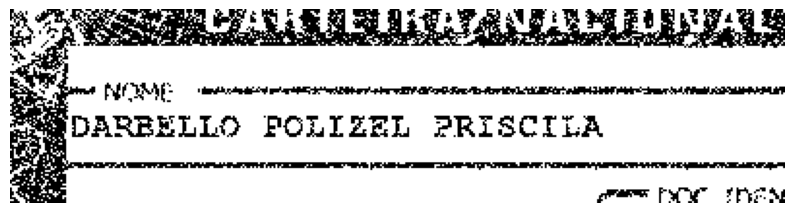

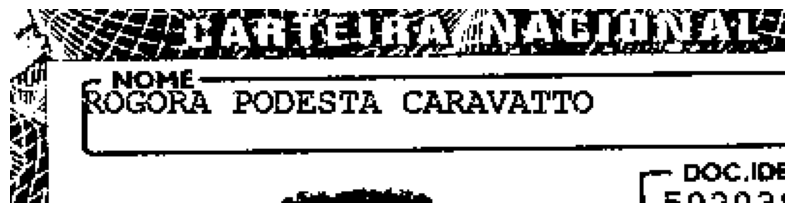

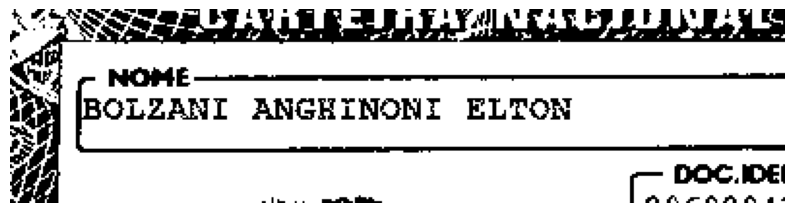

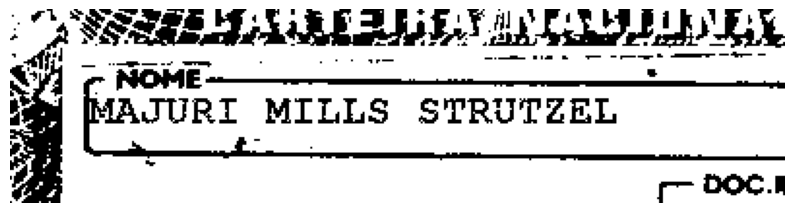

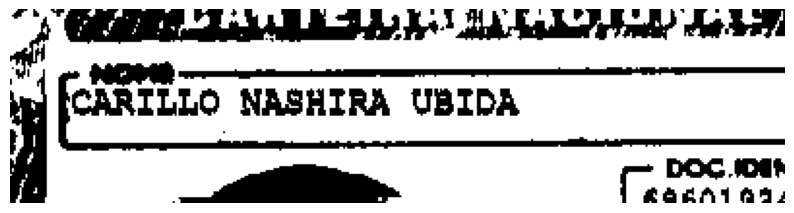

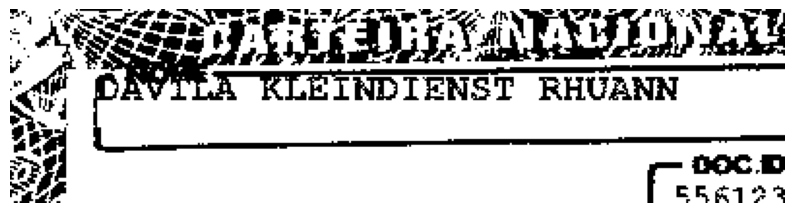

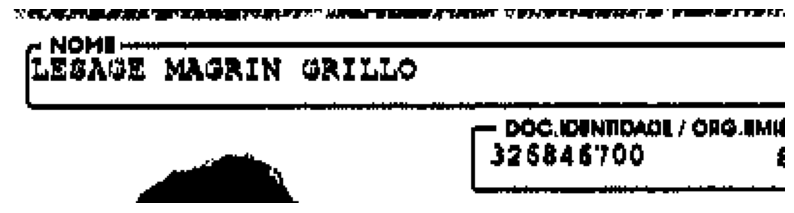

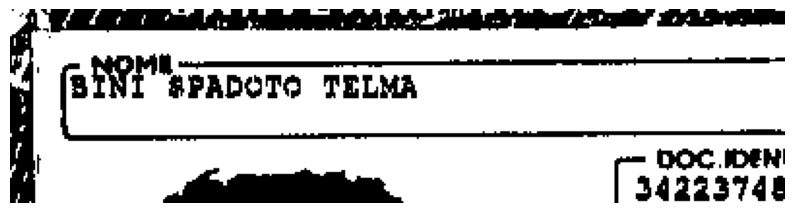

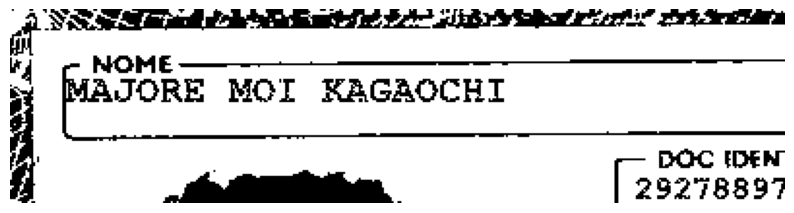

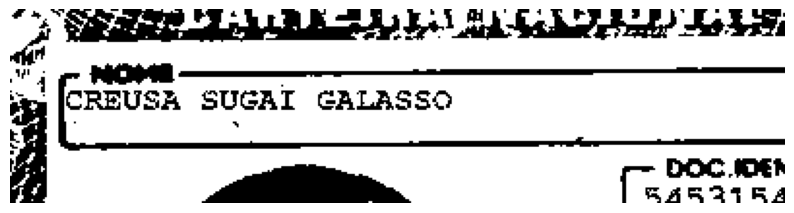

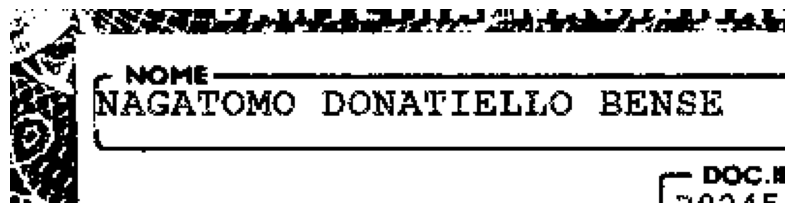

In [74]:
# Inicializa o leitor do EasyOCR para português
reader = easyocr.Reader(['en'])

def extract_name_from_cnh(image_path):
    """Recorta a região do nome na CNH e aplica OCR"""
    # Carregar imagem
    image = cv2.imread(image_path)

    # Ajustar valores conforme necessário para CNHs diferentes
    x, y, w, h = 100, 100, 400, 100  # Coordenadas aproximadas do nome na CNH (ajuste se necessário)

    # Recortar a região do nome
    name_region = image[y:y+h, x:x+w]

    # Converter para tons de cinza e aplicar threshold para melhorar a leitura do OCR
    #gray = cv2.cvtColor(name_region, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(name_region, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print_image(thresh)
    # Salvar a imagem da região do nome (opcional, para verificar o corte)
    cv2.imwrite("recorte_nome.png", thresh)

    # Aplicar OCR na região recortada
    #result = reader.readtext(thresh, decoder='beamsearch')
    # Aplicar OCR na região recortada com parâmetros otimizados
    result = reader.readtext(thresh, 
                             decoder='beamsearch', 
                             contrast_ths=0.5, 
                             #contrast_ths=0, 
                             adjust_contrast=1, 
                             #adjust_contrast=0, 
                             low_text=0.1, 
                             link_threshold=0.8)


    for (bbox, text, prob) in result:
        text = text.strip().upper()  # Normalizar texto para facilitar buscas
        print(text)
    """# Pegar o maior texto identificado na região como nome
    nome = max([text for (_, text, _) in result], key=len, default="NOME NÃO ENCONTRADO").strip().upper()

    # Imprimir o resultado
    print(f"Arquivo: {image_path}")
    print(f"🔹 NOME EXTRAÍDO: {nome}")
    print("=" * 50)"""

# Processa os arquivos da pasta
for file in list(Path('../arq/CNH_Aberta').iterdir())[:]:
    if file.suffix.lower() in ['.png', '.jpg', '.jpeg', '.tiff', '.bmp']:  # Verifica se é imagem
        extract_name_from_cnh(str(file))
